In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
from PIL import Image
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True) # I will get file into flower flower_photos and I save it on (cache_dir), then unzip it using untar

228813984/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir) # Now i convert my data_dir into pathlib, Now it will be more easy to use 
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/16152175716_55d6968e08_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9404876600_04f6d37685.jpg'),
 PosixPath('datasets/flower_photos/roses/2951375433_ae2726d9d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5156037859_1673720a11_m.jpg'),
 PosixPath('datasets/flower_photos/roses/1445228333_59a07e0801.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


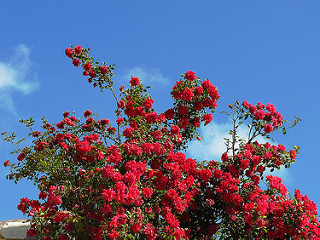

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

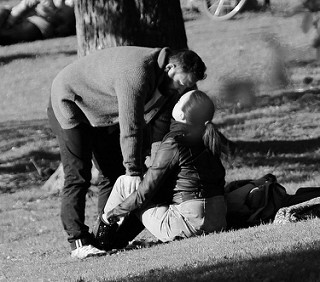

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
flowers_images_dict  = {
    'roses': list(data_dir.glob('roses/*')),
    'tulips': list(data_dir.glob('tulips/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'daisy': list(data_dir.glob('daisy/*'))
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/16152175716_55d6968e08_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9404876600_04f6d37685.jpg'),
 PosixPath('datasets/flower_photos/roses/2951375433_ae2726d9d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5156037859_1673720a11_m.jpg'),
 PosixPath('datasets/flower_photos/roses/1445228333_59a07e0801.jpg')]

In [ ]:
flowers_labels_dict  = {
    'roses': 0,
    'tulips': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'daisy': 4
}

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/16152175716_55d6968e08_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img # It read my img and convert into 3D np.array

array([[[206, 123,  72],
        [207, 124,  73],
        [207, 124,  73],
        ...,
        [209, 133,  80],
        [209, 133,  80],
        [210, 134,  81]],

       [[206, 123,  72],
        [207, 124,  73],
        [207, 124,  73],
        ...,
        [208, 132,  79],
        [209, 133,  80],
        [210, 134,  81]],

       [[206, 123,  72],
        [206, 123,  72],
        [207, 124,  73],
        ...,
        [208, 132,  79],
        [209, 133,  80],
        [209, 133,  80]],

       ...,

       [[ 43,  80,  94],
        [ 56,  78,  89],
        [ 16,  22,  27],
        ...,
        [ 63,  42, 205],
        [ 44,  26, 173],
        [ 41,  21, 158]],

       [[ 44,  94, 116],
        [ 36,  76,  94],
        [ 45,  72,  86],
        ...,
        [ 47,  30, 225],
        [ 98,  44, 255],
        [111,  32, 255]],

       [[ 41, 114, 142],
        [ 41, 105, 129],
        [ 43,  98, 119],
        ...,
        [ 59,  20, 220],
        [ 31,  21, 221],
        [ 21,  12, 216]]

In [ ]:
img.shape

(240, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape # We need to make same dimensions for all images to train our model

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img) # My X is 3D array
        y.append(flowers_labels_dict[flower_name]) # My y must be a number 

In [ ]:
X = np.array(X) # I convert it for future use
y = np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
len(X_train)

2936

In [ ]:
len(X_test)

734

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X_train_scaled[0][:5]

array([[[0.77647059, 0.95686275, 0.77647059],
        [0.78039216, 0.96078431, 0.78039216],
        [0.78039216, 0.96078431, 0.78039216],
        ...,
        [0.30980392, 0.55294118, 0.34509804],
        [0.31764706, 0.56078431, 0.34901961],
        [0.32156863, 0.56862745, 0.35686275]],

       [[0.78039216, 0.95294118, 0.77647059],
        [0.78039216, 0.95686275, 0.77647059],
        [0.78039216, 0.96078431, 0.78039216],
        ...,
        [0.30196078, 0.54901961, 0.34117647],
        [0.30196078, 0.56078431, 0.34509804],
        [0.30196078, 0.56078431, 0.34509804]],

       [[0.78039216, 0.94901961, 0.77254902],
        [0.78039216, 0.94901961, 0.77254902],
        [0.78039216, 0.95294118, 0.77647059],
        ...,
        [0.3254902 , 0.57647059, 0.37254902],
        [0.30588235, 0.56862745, 0.35686275],
        [0.30196078, 0.56862745, 0.35294118]],

       [[0.78039216, 0.94901961, 0.77254902],
        [0.78039216, 0.94901961, 0.77254902],
        [0.78431373, 0.95294118, 0.

In [ ]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'), # I have 16 filters and size of filter is 3, number of filter its just try and error
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(), # Now I convert it into 1D array, for my Dense network
      layers.Dense(128, activation = 'relu'),
      layers.Dense(num_classes) 
]) 
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), # My final array is exact value, so I use this loss
    metrics = ['accuracy']
)
model.fit(X_train_scaled, y_train, epochs = 30)

Epoch 1/30
92/92 [==============================] - 111s 1s/step - loss: 1.4082 - accuracy: 0.4087
Epoch 2/30
92/92 [==============================] - 106s 1s/step - loss: 0.9971 - accuracy: 0.6107
Epoch 3/30
92/92 [==============================] - 107s 1s/step - loss: 0.7983 - accuracy: 0.6975
Epoch 4/30
92/92 [==============================] - 107s 1s/step - loss: 0.6035 - accuracy: 0.7807
Epoch 5/30
92/92 [==============================] - 111s 1s/step - loss: 0.3888 - accuracy: 0.8648
Epoch 6/30
92/92 [==============================] - 109s 1s/step - loss: 0.2340 - accuracy: 0.9240
Epoch 7/30
92/92 [==============================] - 109s 1s/step - loss: 0.1325 - accuracy: 0.9608
Epoch 8/30
92/92 [==============================] - 112s 1s/step - loss: 0.0772 - accuracy: 0.9802
Epoch 9/30
92/92 [==============================] - 113s 1s/step - loss: 0.0494 - accuracy: 0.9874
Epoch 10/30
92/92 [==============================] - 115s 1s/step - loss: 0.0419 - accuracy: 0.9891
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 9s 397ms/step - loss: 2.6483 - accuracy: 0.6349


[2.6483075618743896, 0.6348773837089539]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

23/23 [==============================] - 9s 397ms/step


array([[  7.5305   ,  20.394043 , -22.14361  ,   0.8869725, -14.297422 ],
       [ -1.687555 ,   1.5116625,   2.4702125,  -4.7342954,  -3.5974035],
       [  0.7267172,   4.050582 ,  -1.4800531,  -2.179943 ,  -5.204134 ],
       ...,
       [  5.2102776,   8.887596 , -15.1570835,   4.530371 ,  -5.6556883],
       [  3.7519896,  14.579965 , -19.986391 ,  -3.827338 ,  -5.643783 ],
       [  1.6932896,   1.207929 ,  11.978972 , -12.927489 ,  -9.533778 ]],
      dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

1

In [ ]:
y_test[0]

1

In [ ]:
data_augmentation = keras.Sequential(
    [
      
    #layers.experimental.preprocessing.RandomFlip("horizontal", # This make flip of my image
                                                #input_shape=(img_height, img_width, 3)),"""
                                                             
    layers.experimental.preprocessing.RandomRotation(0.1), # This rotate the object                                  
    layers.experimental.preprocessing.RandomZoom(0.1) # Its transformation to zoom an object

])

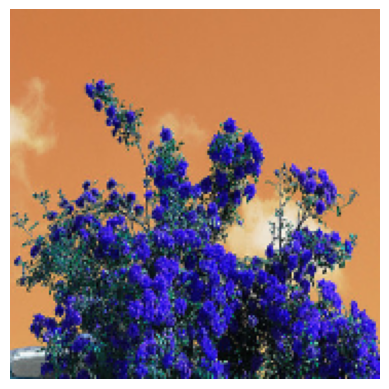

In [ ]:
plt.axis('off')
plt.imshow(X[0])

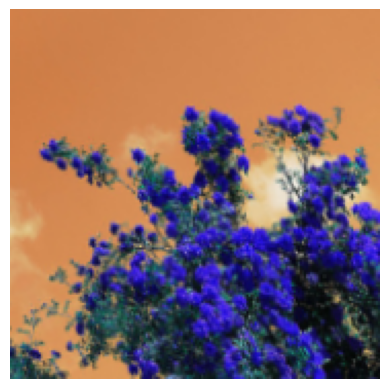

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Dropout(0.2), # I drop some of my neuros for better accuracy score
    layers.Flatten(),

    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)
model.fit(X_train_scaled, y_train, epochs = 20)

Epoch 1/20
92/92 [==============================] - 136s 1s/step - loss: 1.3049 - accuracy: 0.4332
Epoch 2/20
92/92 [==============================] - 126s 1s/step - loss: 1.0533 - accuracy: 0.5705
Epoch 3/20
92/92 [==============================] - 128s 1s/step - loss: 0.9563 - accuracy: 0.6161
Epoch 4/20
92/92 [==============================] - 127s 1s/step - loss: 0.8781 - accuracy: 0.6669
Epoch 5/20
92/92 [==============================] - 130s 1s/step - loss: 0.7972 - accuracy: 0.6941
Epoch 6/20
92/92 [==============================] - 129s 1s/step - loss: 0.7643 - accuracy: 0.6986
Epoch 7/20
92/92 [==============================] - 128s 1s/step - loss: 0.7036 - accuracy: 0.7228
Epoch 8/20
92/92 [==============================] - 124s 1s/step - loss: 0.6395 - accuracy: 0.7469
Epoch 9/20
92/92 [==============================] - 127s 1s/step - loss: 0.6171 - accuracy: 0.7612
Epoch 10/20
92/92 [==============================] - 123s 1s/step - loss: 0.5839 - accuracy: 0.7769
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 9s 374ms/step - loss: 0.9501 - accuracy: 0.7057


[0.9500532150268555, 0.7057220935821533]